In [1]:
import torch
from utils.func import show_gradient_maps
from models.Model import ConvNet

In [29]:
# Load the distilled file
data = torch.load('data/Distilled_MNIST/distilled_mnist.pt')
X_list = data['X']   # this was your X_syn
Y_list = data['Y']   # this was your Y_syn

# Suppose we want to use the *last* stage (or pick stage i-1):
stage = -1
X_syn = X_list[stage]  # Tensor of shape [synthetic_size, C, H, W]
Y_syn = Y_list[stage]  # Tensor of shape [synthetic_size, num_classes]

X_stage = X_syn[0]         # Tensor: [synthetic_size, C, H, W]
Y_stage = Y_syn[0]         # Tensor: [synthetic_size, num_classes]

# If Y_stage is soft, get hard labels:
X_stage = X_stage.unsqueeze(1)
print("X_stage.shape:", X_stage.shape)

X_stage.shape: torch.Size([1, 1, 28, 28])


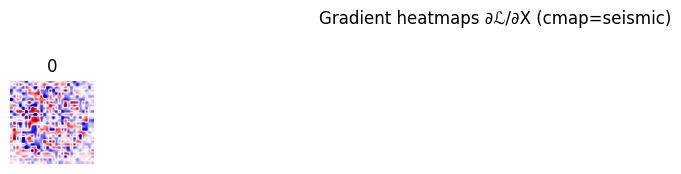

In [30]:
show_gradient_maps(model_fn=lambda: ConvNet(in_channels=1, num_classes=10),
                   X_syn=X_stage,
                   y_hard=Y_stage,
                   num_classes=10)